# The Probability Density Function (PDF)

## Introduction
So far, you learned about discrete random variables and how to calculate or visualize their distribution functions. In this lesson, you'll learn about continuous variables and probability density function (PDF) as a way to model the probability of occurrence for these types of variables.

## Objectives
You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Differentiate between probability and probability density
* Explain why it is not possible to calculate the probability for a specific point with continuous variables
* Estimate probabilities for continuous variables by using interpolation 

## Continuous Variables

Continuous variables can take on any real value. For example, let's say that the height of a person is 6.1 feet. Is this person _actually_ exactly 6.1 feet? How precise is this measurement? In reality, the height could be 6.11 feet, 6.09 feet or 6.1000033 feet.

Ultimately, we can not identify the exact value of a continuous variable. Instead, we can approximate it to a given accuracy. These mathematical nuances lead to some interesting properties when investigating the associated probabilities of these values. 

Typical examples of continuous variables are height, weight, temperature, and other variables that can take on *any* real value.

## Probability versus Probability Density 

Continuous variables can take on an infinite number of variables. Let's have another look at the temperature in NYC on June 1st. Here, we can say our random variable X represents possible temperatures on June 1st in NYC.


<img src="images/weather_NYC.png" width ="500">


Looking at the plot above, you can see that most of the values lie around the mean (around 80 degrees Fahrenheit). As you move away from the mean in both directions, the blue line goes down creating two tails at both ends. The blue line above shows a **Probability Density Function**, as compared to probability functions we saw when looking at the PMFs.


A Probability Density Function (PDF) helps identify the regions in the distribution where observations are more likely to occur, in other words, where the observation occurrence is **more dense**. It is actually not hard to think about the analogy with a probability mass function. Imagine that we would put out temperatures in "bins" of about 1.5 degrees Fahrenheit. This is what your function would look like:

<img src="images/weather_NYC_21.png" width ="500">

The histogram you see here may remind you very much of the PMF you saw before! Remember that when dealing with PMFs, you calculated the **mass** for each class, or the number of occurrences. This is exactly what we did creating this histogram. The idea is that, when you "bin" your continuous variables, and you gradually increase the number of bins used, you get a function-like outline of your bins which looks exactly like the PDF:

<img src="images/weather_NYC_250.png" width ="500">

For the distribution of NYC temperatures, the mean region has a high probability density as compared to tails. This means that more extreme temperatures (roughly <70 or >90) are way less likely on a late spring day like June 1. 
The function shape here is an example of a **Normal Distribution**, which you'll learn more about later.

>The probability density function (also called a probability distribution function) shows all possible values for temperature, which in theory has an infinite amount of possibilities. 



## Interpreting the PDF

Let's look at this plot again and the y-axis:

<img src="images/weather_NYC_21_red.png" width ="500">

Looking at the histogram, and based on the middle bin, you can make the following statement:

**About 13% of the time you'll observe a temperature between 79.3 and 80.8 Degrees Fahrenheit**.

This is a typical probability mass function statement, where one bar or bin is associated with a fixed probability. The reason why we were able to do this is because we _binned_ the temperatures.

When interpreting probability density functions, you need to be **very** careful about determining probabilities for certain events, especially when it comes to exact numbers of events occurring. For example, think about this: if we have a very high tech thermometer, what is the probability that the temperature in NYC on June 1 is _exactly_ 80 Degrees?

$$P(\text{Temp}=80)$$

Looking at the graph, you may think that this probability is around 0.13, **but this is not the case**. The idea of continuous variables and PDFs is that the probability of any given arbitrary number is always 0, simply because there is an infinite number of possibilities we can check (what is $P(\text{Temp}=80.3)? $ $P(\text{Temp}=80.0001)$?$P(\text{Temp}=80.00000895)?$) So, the probability of the temperature being exactly 80 Degrees is 0. When using a PDF, the only way of finding a probability associated with a certain temperature here is when using an _interval_ of ranges, so something like:

$$P( 79.9 < \text{Temp} < 80.1 )$$

You'll see more on this later!

## Visualizing Probability Density Functions

PDFs can be visualized using histograms and density plots. You've had quite a bit of practice on histograms. 
Now, you'll learn how to plot a density plot for a distribution in Python. 

### Density Estimation and Plotting
 
As you've seen before, a density plot is a "smoothed" version of a histogram estimated from the observations. To estimate a density function from given continuous data, you can use parametric or non-parametric methods. 

**Parametric methods** use parameters like mean and standard deviation of given data and attempt to work out the **shape** of the distribution that the data belongs to. These may implement maximum likelihood methods to fit a distribution to the given data. You'll learn more about this later.

**Kernel density estimation** or KDE is a common non-parametric estimation technique to plot a curve (the kernel) at every individual data point. These curves are then added to plot a smooth density estimation. The kernel most often used is a Gaussian (which produces a bell curve at each data point). Other kernels can be used in special cases when the underlying distribution is not normal. 

<img src="images/density_and_hist.png" width ="750">

In the image above, the histogram (left) and kernel density estimate (right) are constructed using the same data.

## Expected Value and Variance 

Next, let's explore expected value and variance for PDFs. Recall the following two formulas for PMFs:

$$\large  E(X) = \mu = \sum_i p(x_i)x_i$$
$$\large E((X-\mu)^2) = \sigma^2 = \sum_i p(x_i)(x_i-\mu)^2$$


We want to translate this to something we can use in this context of probability density functions. Note how $P(X=x_i)=p(x_i)$ is part of this formula, and how we mentioned before that for PDFs, the probability of our random variable taking exactly a specified value is 0. We need to change our formulas slightly, and this can be done by using **integrals**:

$$ \large E(X) = \mu = \int_{- \infty}^{+ \infty} p(x)x dx$$
$$ \large E((X-\mu)^2) = \sigma^2  = \int_{- \infty}^{+ \infty} p(x)(x-\mu)^2 dx$$


Recall how the integral basically is a measure to calculate the area under a certain curve. Thinking of it this way, the transition from a histogram to a curve makes much more sense as well. Let's look at the plot below for an illustration. If you want to get the probability to obtain exactly 9, you would get a 1-dimensional line down which isn't really an "area". For this reason, $P(X=9)=0$. 

If you want to determine the probability of observing a value within a specific range though, you can look at the area under the curve to obtain this probability as highlighted in red below:


![](images/pdf2.jpg)

The formal mathematical representation for calculating an area under the curve is given by:

$$ \Large P(a \leq x \leq b) = \int_a^b f(x) dx \geq 0 $$

> To obtain a probability of observing a value in an interval $[a,b]$, you can use an integral (which gives you the area under the curve) from a to b using your PDF $f(x)$ 

Don't worry too much about the adapted formula for PDFs. The main takeaway here is that you simply can't use the same summation expression because $P(X=x_i) = 0$ for any $x_i$.

## Seaborn 

At this stage, it's useful to have another look at the visualization library **Seaborn**, which can do wonders for statistical visualizations.


We'll quickly introduce density plot creation using Seaborn here. You'll learn about other Seaborn plots at a later stage!

Let's import the Seaborn library first.

In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

The function that we are interested in right now is  the `seaborn.distplot()` function which can help visualize a distribution in a number of statistical ways including histograms, density plots, and area plots with a lot of coloring and customization features. 
```
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```
 [Here is the official documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you want to learn more!

## Let's Look at Some Data

We'll look at another weight-height dataset, this time containing 10,000 observations about the heights and weights of individuals, grouped by gender. Let's load the dataset first.

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

data = pd.read_csv('weight-height.csv')

print(data.head())
data.describe()

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Let's plot the density plot for data in the `Height` column using seaborn `distplot()`. We'll be plotting:

* a Box and Whiskers plot 
* a histogram 
* a non-parametric Kernel Density Estimation plot
* Parametric distribution fit plot

... all in one single go. 

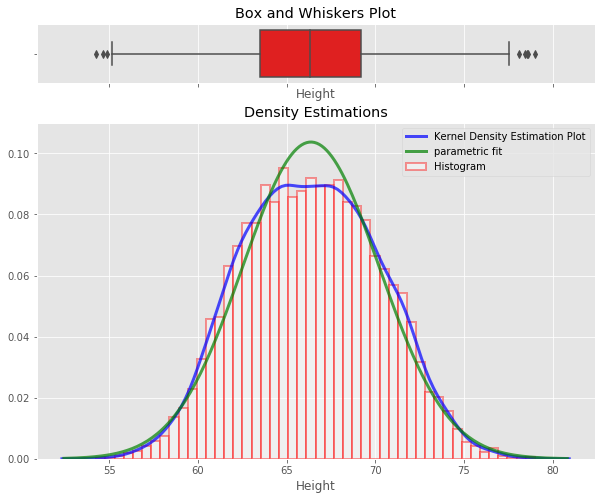

In [3]:
import scipy.stats as stats
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(data.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=data.Height, ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .08))
plt.ylim(0,0.11)
plt.legend();

You can see how you can easily visualize multiple statistical aspects of a distribution.

You can further customize these plots as you wish. You can have a look at official Seaborn documentation for their color pellets, styles, labeling options, etc. 


## Interpolation

Another (rather naive - yet effective) way is to estimate a density function using interpolation between the peaks of the histogram. We can use the `np.histogram` function to calculate histogram values and interpolate between these values to plot a density curve.

In [4]:
import numpy as np
n, bins = np.histogram(data.Height, 20, density=1)
n , bins

(array([0.00040428, 0.00145539, 0.00533644, 0.01228997, 0.02603534,
        0.04883648, 0.07034393, 0.08376588, 0.09031514, 0.08724265,
        0.08958744, 0.08562554, 0.07204189, 0.05829652, 0.0412361 ,
        0.02061805, 0.00970261, 0.00347677, 0.00153625, 0.00040428]),
 array([54.26313333, 55.49991378, 56.73669423, 57.97347468, 59.21025513,
        60.44703558, 61.68381603, 62.92059648, 64.15737693, 65.39415738,
        66.63093784, 67.86771829, 69.10449874, 70.34127919, 71.57805964,
        72.81484009, 74.05162054, 75.28840099, 76.52518144, 77.7619619 ,
        78.99874235]))

Here `n` represents the values of the histogram and `bins` are the bin positions along the x -axis. We can interpolate between these values to calculate the points for the density curve as you can see below. 

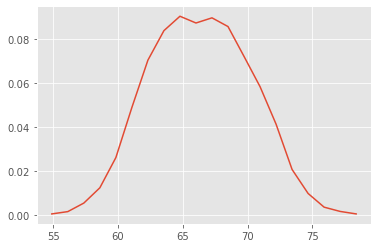

In [5]:
# Initialize numpy arrays according to number of bins with zeros to store interpolated values
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

# plot the calculated curve
plt.plot(pdfx, pdfy);

That looks reasonable! This plot reflects our density function. You can plot it on top of the normalized histogram now and get a complete picture of underlying data. 

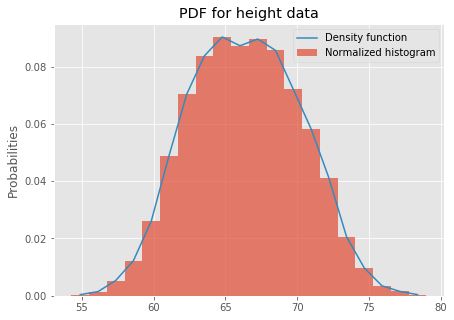

In [6]:
plt.figure(figsize=(7,5))
data.Height.plot.hist(bins = 20, density=True, label = 'Normalized histogram', alpha = 0.7)
# plot the calculated curve
plt.plot(pdfx, pdfy, label = 'Density function')
plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()

This looks pretty good! In the next lab, you'll practice your knowledge!

**NOTE**: Be careful when using this naive interpolation method! The results depend very much on the number of bins used when creating your histogram.

## Summary
In this lesson, you learned about the probability density function and identified the difference between point probabilities (for PMFs) and PMFs for continuous variables. One important takeaway is that the probability of a specific value for a continuous variable is zero! You can use integrals to get probabilities for a range of values when using PDFs. The idea of taking ranges of values will become more important when looking at Cumulative Density Functions, but let's practice our PDF knowledge first! 